<a href="https://colab.research.google.com/github/JoeArmel/JoeArmel/blob/main/MangoesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://docs.google.com/spreadsheets/d/1-5nMiGvkfxiSWc_tMemaaizKGGKn-16w/edit?usp=sharing&ouid=105169417883506382120&rtpof=true&sd=true

--2022-03-12 21:03:14--  https://docs.google.com/spreadsheets/d/1-5nMiGvkfxiSWc_tMemaaizKGGKn-16w/edit?usp=sharing
Resolving docs.google.com (docs.google.com)... 172.217.203.101, 172.217.203.102, 172.217.203.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘edit?usp=sharing’

edit?usp=sharing        [ <=>                ]  15.95K  --.-KB/s    in 0s      

2022-03-12 21:03:15 (46.8 MB/s) - ‘edit?usp=sharing’ saved [16328]



In [ ]:
import pandas as pd

In [ ]:
# Connexion de Colab à Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Importation des données et chargement dans le dataframe mangoes
mangoes = pd.read_excel('gdrive/MyDrive/Colab Notebooks/MangoesData.xlsx', sheet_name=0, header=0, index_col=0)

# Suppression des lignes vides et ré-indexation
df = mangoes.dropna()


In [ ]:
df.describe()

,MAFRU,MAPUP,MAPEA,MANOY,MAAMD,VOFRU,POSPC,VOLNO,VOLAM,DLONO,...,DLAFR,EPAFR,DEAMD,PAFRU,INDCA,COEFF,INSPH,FERMT,PROPU,MP/MN
count,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,286.743000,192.681000,43.09400,45.858000,22.42300,281.320000,0.93220,44.200000,20.780000,8.110500,...,64.647400,4.199100,6.112100,8.526500,3.636000,1.811000,22.534000,20.830000,1.424000,8.841000
std,101.112846,82.093372,14.58202,9.808728,4.20915,92.485094,0.17881,22.050447,10.176801,2.459091,...,11.839652,1.418114,0.929518,1.117027,0.517281,0.206043,4.310692,10.259319,0.927603,3.270449
min,125.100000,59.800000,22.30000,26.000000,11.10000,130.000000,0.47000,5.000000,3.000000,5.730000,...,25.000000,1.370000,4.400000,5.700000,2.700000,1.200000,11.100000,3.000000,0.420000,3.400000
25%,209.125000,138.300000,32.00000,40.000000,19.15000,200.000000,0.91000,30.000000,10.000000,6.835000,...,58.875000,3.200000,5.300000,7.700000,3.200000,1.700000,19.150000,10.000000,0.800000,5.837500
50%,262.000000,177.000000,39.00000,46.950000,22.45000,280.000000,0.97000,45.000000,20.000000,7.390000,...,65.865000,4.085000,6.100000,8.600000,3.600000,1.800000,22.450000,20.000000,1.120000,8.585000
75%,366.475000,253.225000,49.75000,52.000000,24.60000,350.000000,1.00000,60.000000,30.000000,8.467500,...,71.000000,5.130000,7.000000,9.400000,4.050000,1.962500,24.925000,30.000000,1.875000,10.637500
max,521.000000,414.000000,87.00000,76.800000,35.00000,510.000000,1.60000,90.000000,40.000000,17.040000,...,91.230000,7.810000,8.050000,12.300000,4.600000,2.300000,35.000000,40.000000,5.900000,19.330000


In [ ]:
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing

In [ ]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = df.iloc[:, 1:]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
localité = df["LOCAL"] # ou df.index pour avoir les variétés
variétés = df.index
features = df.columns[1:]

local = df["LOCAL"].unique()

#nombre d'observations
n = X.shape[0]

#nombre de variables
p = X.shape[1]

In [ ]:
print(n)
print(p)

100
23


In [ ]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

Vérifions les propriétés du nouvel ensemble de données. Les
moyennes sont maintenant nulles (aux erreurs de troncature près) :

In [ ]:
print(np.mean(X_scaled, axis=0))

[ 5.99520433e-17  2.24265051e-16 -5.62883073e-16  1.04249942e-15
 -4.61852778e-16  9.38138456e-17  1.05637721e-15 -5.32907052e-17
 -1.22124533e-16 -3.17801341e-17 -1.78523862e-15  3.24740235e-17
 -4.03010958e-16 -3.68594044e-16  2.77555756e-16  1.16934240e-15
 -3.64153152e-16  6.41153797e-16 -7.75213227e-16 -5.59552404e-16
  1.79856130e-16 -1.36557432e-16 -3.39173134e-16]


Et les écarts-type unitaires

In [ ]:
print(np.std(X_scaled, axis=0, ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Nous sommes maintenant parés pour lancer l’ACP.

In [ ]:
#instanciation
acp = decomposition.PCA(svd_solver='full')

#affichage des paramètres
print(acp)

PCA(svd_solver='full')


Nous pouvons lancer les traitements. La fonction **fit_transform()**
renvoie en sortie les coordonnées factorielles que nous collectons dans la variable *coord*. Nous affichons le nombre de composantes générées; il est bien
égal à 23

In [ ]:
#calculs
coord = acp.fit_transform(X_scaled)

#nombre de composantes calculées
print(acp.n_components_)

23


**Valeurs propres et scree plot**

In [ ]:
#variance expliquée
print(acp.explained_variance_)

[8.23087868e+00 3.43654216e+00 2.14341733e+00 1.66143488e+00
 1.43966972e+00 9.87594305e-01 9.14022915e-01 8.27653230e-01
 6.68632225e-01 6.07294415e-01 5.20491637e-01 4.10733135e-01
 3.32371670e-01 2.28856517e-01 1.98415893e-01 1.80423759e-01
 1.51627610e-01 1.10655788e-01 7.62462095e-02 5.11819089e-02
 3.77213258e-02 1.54059949e-02 1.05191886e-03]


In [ ]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[8.14856989e+00 3.40217674e+00 2.12198316e+00 1.64482053e+00
 1.42527302e+00 9.77718362e-01 9.04882686e-01 8.19376698e-01
 6.61945903e-01 6.01221470e-01 5.15286720e-01 4.06625804e-01
 3.29047953e-01 2.26567952e-01 1.96431734e-01 1.78619522e-01
 1.50111334e-01 1.09549230e-01 7.54837474e-02 5.06700899e-02
 3.73441125e-02 1.52519350e-02 1.04139967e-03]


In [ ]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[8.14856989e+00 3.40217674e+00 2.12198316e+00 1.64482053e+00
 1.42527302e+00 9.77718362e-01 9.04882686e-01 8.19376698e-01
 6.61945903e-01 6.01221470e-01 5.15286720e-01 4.06625804e-01
 3.29047953e-01 2.26567952e-01 1.96431734e-01 1.78619522e-01
 1.50111334e-01 1.09549230e-01 7.54837474e-02 5.06700899e-02
 3.73441125e-02 1.52519350e-02 1.04139967e-03]


In [ ]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[3.54285648e-01 1.47920728e-01 9.22601373e-02 7.15139363e-02
 6.19683922e-02 4.25094940e-02 3.93427255e-02 3.56250738e-02
 2.87802566e-02 2.61400639e-02 2.24037704e-02 1.76793828e-02
 1.43064328e-02 9.85078052e-03 8.54051018e-03 7.76606616e-03
 6.52657973e-03 4.76300998e-03 3.28190206e-03 2.20304738e-03
 1.62365707e-03 6.63127607e-04 4.52782467e-05]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

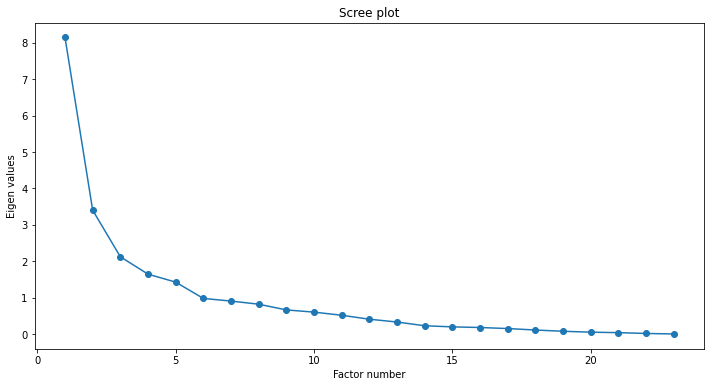

In [ ]:
#scree plot
fig=plt.figure(figsize=(12,6))
plt.plot(np.arange(1,p+1),eigval, 'o-')
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
fig.savefig('gdrive/MyDrive/Colab Notebooks/screeplot.png')
plt.show()

Le graphique du cumul de variance restituée selon le nombre de facteurs peut être intéressant également.

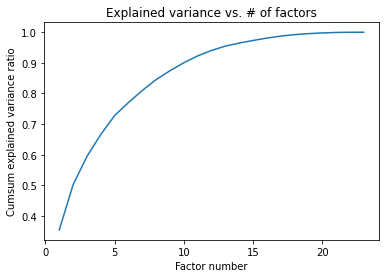

In [ ]:
#cumul de variance expliquée
fig = plt.figure(figsize=(12,6))
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
fig.savefig('gdrive/MyDrive/Colab Notebooks/explainedVarianceRatio.png')
plt.show()


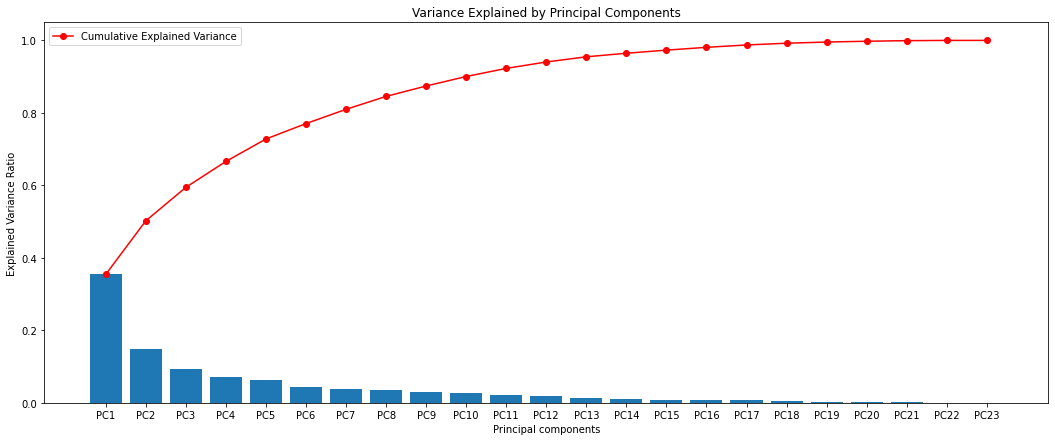

In [ ]:
cp_list =  ["PC"+str(i) for i in list(range(1, p+1))]
variance_df = pd.DataFrame({'variance':acp.explained_variance_ratio_, 'CP':cp_list})

#
fig, axes = plt.subplots(figsize=(18,7))

#cumul de variance expliquée
plt.bar(x='CP', height='variance', data=variance_df)
plt.plot(np.arange(0,p),np.cumsum(acp.explained_variance_ratio_), 'ro-', label='Cumulative Explained Variance')
plt.title("Variance Explained by Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal components")

plt.legend()

fig.savefig('gdrive/MyDrive/Colab Notebooks/explainedVarianceRatio.png')
plt.show()

Les ‘’cassures’’ dans les graphiques ci-dessus sont souvent évoquées
(règle du coude) pour identifier le nombre de facteurs K* à retenir. La solution (K* = 2) semble s’imposer ici.

D’autres pistes existent pour répondre à cette question notamment, le « test des bâtons brisés » de Legendre & Legendre. 

Le test consiste à calculer des seuils bk associés aux valeurs propres λk. Le facteur n°k est validé si (λk > bk), où λk est la valeur propre associée à l’axe n°k.

Calculons ces seuils :

In [ ]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [ ]:
#test des bâtons brisés
bb_df=pd.DataFrame({'Val.Propre':eigval,'Seuils':bs})
bb_df.to_excel('gdrive/MyDrive/Colab Notebooks/MangoesData_TestBatonsBrisés.xlsx', sheet_name='Test des bâtons brisés')

D'après ce test, seuls les deux premiers facteurs sont valides

## **Représentation des individus – Outils pour l’interprétation**

**Coordonnées factorielles.** Les coordonnées factorielles (Fik) des individus ont été collectées dans la variable *coord*. Nous les positionnons dans le premier plan factoriel avec leurs labels pour situer et comprendre les proximités.


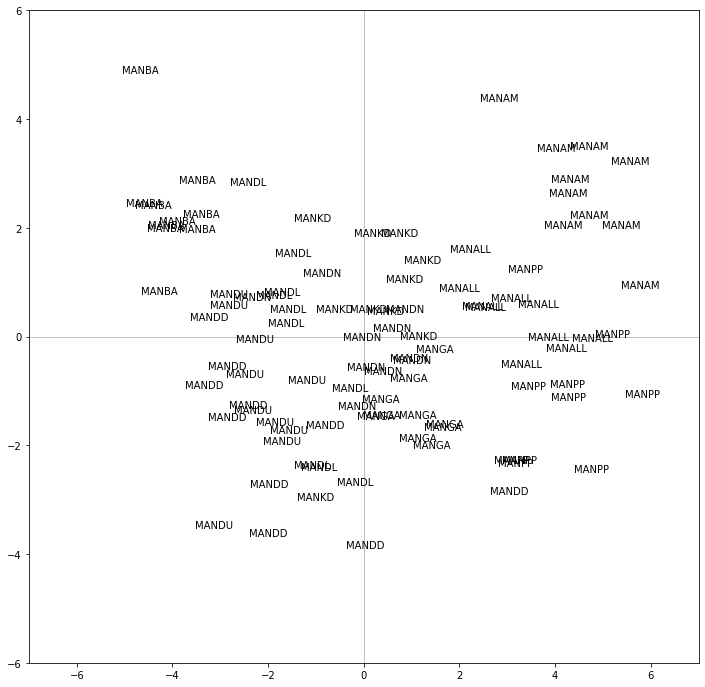

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-7,7) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
 plt.annotate(variétés[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-7,7],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [ ]:
df2 = pd.DataFrame({'var':variétés, 'CP1':coord[:,0], 'CP2':coord[:,1], 'lieu':localité})
df2.head()

,var,CP1,CP2,lieu
VARTE,,,,
MANALL,MANALL,4.359998,-0.087565,MLTMP
MANALL,MANALL,2.654527,0.642667,MLTMP
MANALL,MANALL,3.218963,0.533120,MLTMP
MANALL,MANALL,1.565835,0.836507,MLTMP
MANALL,MANALL,2.860636,-0.560357,MLTMP


In [ ]:
var_df = pd.DataFrame({'VARTE':variétés, 'F1':coord[:,0], 'F2':coord[:,1] })

VarCentre = var_df.pivot_table(index='VARTE', values=['F1','F2'], aggfunc=pd.Series.mean)

#puis calculer les moyennes conditionnelles
VarCentre.to_excel('gdrive/MyDrive/Colab Notebooks/MangoesData_MoyenneConditionnelleVARTE.xlsx', sheet_name='VARTE Moyenne Conditionnelle')
print(VarCentre)

              F1        F2
VARTE                     
MANALL  2.788628  0.355253
MANAM   4.173370  2.682910
MANBA  -4.428352  2.334216
MANDD  -2.044071 -1.901562
MANDL  -1.694334 -0.225861
MANDN  -0.348027 -0.133488
MANDU  -2.609135 -1.078953
MANGA   0.647879 -1.420504
MANKD  -0.185192  0.642167
MANPP   3.699235 -1.254178


In [ ]:
loc_df = pd.DataFrame({'LOCAL':localité, 'F1':coord[:,0], 'F2':coord[:,1] })

LocalCentre = loc_df.pivot_table(index='LOCAL', values=['F1','F2'], aggfunc=pd.Series.mean)

LocalCentre.to_excel('gdrive/MyDrive/Colab Notebooks/MangoesData_MoyenneConditionnelleLOCAL.xlsx', sheet_name='LOCAL Moyenne Conditionnelle')

print(LocalCentre)

             F1        F2
LOCAL                    
EBDAO  1.757021 -0.306005
FBNKO  4.173370  2.682910
FBTMA -4.428352  2.334216
MLTMP  0.547147  0.064696
SAAMM -2.609135 -1.078953
SAANE -0.348027 -0.133488
SAANM  0.647879 -1.420504
SAANO -2.044071 -1.901562


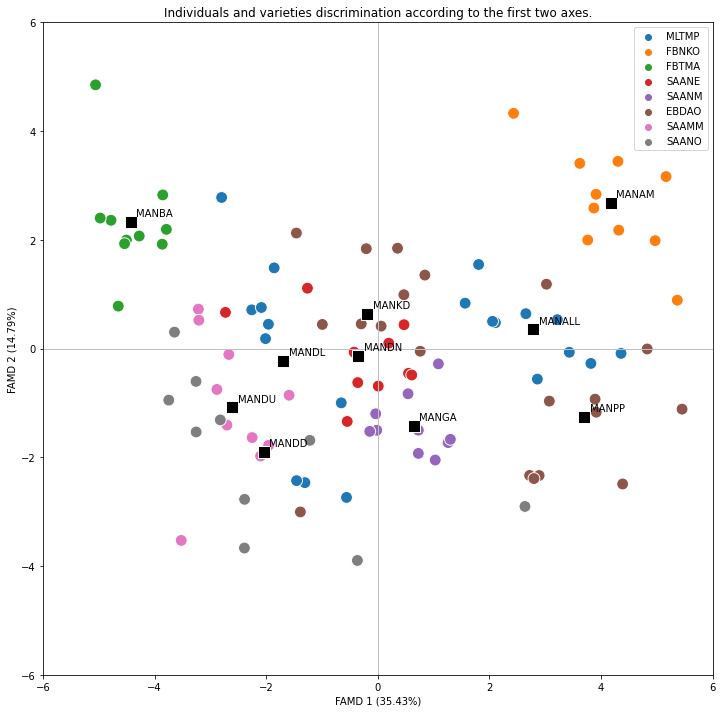

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
axes.set_xlabel('FAMD 1 (35.43%)')
axes.set_ylabel('FAMD 2 (14.79%)')

sns.scatterplot(data=df2, x='CP1', y='CP2', hue='lieu', s=140)
sns.scatterplot(data=VarCentre, x='F1', y='F2', marker='s', color='black', s=140)

#placement des étiquettes des observations
for i in range(VarCentre.shape[0]):
 plt.annotate(VarCentre.index[i],(0.1 + VarCentre['F1'][i], 0.1 + VarCentre['F2'][i]), size='medium')

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#Ajout d'un titre
axes.set_title('Individuals and varieties discrimination according to the first two axes.')

fig.savefig('gdrive/MyDrive/Colab Notebooks/mangoes_pca_LOCAL_VARTE.png')
#affichage
plt.show()

**Qualité de représentation** – Les COS² (cosinus carré). Pour calculer la qualité de
représentation des individus sur les axes, nous devons d’abord calculer les carrés des
distances à l’origine des individus, qui correspondent également à leur contribution dans
l’inertie totale

In [ ]:
#contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
pd.DataFrame({'VARTE':variétés,'d_i':di}).to_excel('gdrive/MyDrive/Colab Notebooks/MangoesData_ContribIndivInertieTotale.xlsx', sheet_name="Contrib_indiv inertie totale")

In [ ]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
pd.DataFrame({'VARTE':variétés,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}).to_excel('gdrive/MyDrive/Colab Notebooks/MangoesData_QualRepIndiv.xlsx', sheet_name='QualiteRepresIndiv_COS2')

Conformément à la théorie, pour chaque individu, la somme des COS² sur l’ensemble des
facteurs est égale à 1.

In [ ]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


**Contribution des individus aux axes (CTR)**. Elles permettent de déterminer les
individus qui pèsent le plus dans la définition de chaque facteur.

In [ ]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

pd.DataFrame({'VARTE':variétés,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}).to_excel('gdrive/MyDrive/Colab Notebooks/MangoesData_ContribAxes.xlsx', sheet_name='Contrib aux axes')

## **Représentation des variables – Outils pour l’aide à l’interprétation**
Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le
champ **.components_**


In [ ]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 3.21586613e-01  3.14759324e-01  2.74133282e-01  2.38524946e-01
   1.12181498e-01  3.15268721e-01 -9.84670866e-02  1.28200324e-01
   1.24861648e-01  2.48774573e-01 -1.31628669e-01  1.42836994e-01
   1.06403916e-01  1.72989417e-01  2.62091937e-01  3.32203322e-01
   1.03703942e-01  2.69686999e-01  9.99872700e-02  1.01144241e-01
   1.23023435e-01 -1.42532024e-01 -2.29533945e-01]
 [ 1.93243748e-02  1.54283449e-04  1.04641901e-01  8.55817597e-03
  -7.18316227e-02  8.90392344e-03 -3.14531150e-01 -1.42574598e-01
  -4.26944285e-01  2.01251259e-01 -2.83087261e-01  3.20902173e-01
   1.27620534e-01 -1.42926403e-01 -7.55393909e-02  6.06326367e-02
  -2.12425591e-01  7.64349905e-02  1.75615406e-01 -1.04386896e-01
  -4.27835158e-01  3.63759760e-01  6.35685937e-02]
 [-6.53575445e-02 -4.84149503e-02 -3.65705468e-02 -1.99273695e-01
   2.00676112e-01 -1.00899267e-01 -2.97454369e-01 -3.80727183e-01
   2.37926526e-01  2.39693656e-01 -8.88493021e-02  3.24311976e-01
  -2.99066041e-01  1.68439926e-01  1.099

In [ ]:
vecteur = pd.DataFrame(data=acp.components_, columns=features)
vecteur.head()

,MAFRU,MAPUP,MAPEA,MANOY,MAAMD,VOFRU,POSPC,VOLNO,VOLAM,DLONO,...,DLAFR,EPAFR,DEAMD,PAFRU,INDCA,COEFF,INSPH,FERMT,PROPU,MP/MN
0,0.321587,0.314759,0.274133,0.238525,0.112181,0.315269,-0.098467,0.128200,0.124862,0.248775,...,0.172989,0.262092,0.332203,0.103704,0.269687,0.099987,0.101144,0.123023,-0.142532,-0.229534
1,0.019324,0.000154,0.104642,0.008558,-0.071832,0.008904,-0.314531,-0.142575,-0.426944,0.201251,...,-0.142926,-0.075539,0.060633,-0.212426,0.076435,0.175615,-0.104387,-0.427835,0.363760,0.063569
2,-0.065358,-0.048415,-0.036571,-0.199274,0.200676,-0.100899,-0.297454,-0.380727,0.237927,0.239694,...,0.168440,0.109956,-0.006840,-0.155494,-0.057184,-0.109426,0.309204,0.240087,-0.072846,0.336735
3,-0.005082,-0.081993,0.230453,0.264404,0.261270,-0.032065,-0.151400,0.053357,-0.045929,0.210002,...,-0.346121,-0.261018,-0.071426,0.490407,-0.063627,0.043389,0.245671,-0.048337,0.054237,0.164419
4,0.089035,0.175930,-0.096125,-0.079200,0.363688,0.120573,0.202757,-0.207454,-0.195199,-0.206044,...,0.168628,0.273489,0.017122,0.111824,-0.155432,-0.087441,0.434262,-0.194591,0.319255,0.136662


Les facteurs sont en ligne, les variables en
colonne. Nous devons en tenir compte pour obtenir les corrélations (variables x facteurs, 𝑟𝑗𝑘)
en les multipliant par la racine carrée des valeurs propres :

In [ ]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 9.17991499e-01  3.56437909e-02 -9.52065206e-02 -6.51714321e-03
   1.06294634e-01  6.13587217e-02 -8.15505906e-02 -2.00834761e-01
  -1.43064667e-01 -1.41051501e-01 -3.32106272e-02 -2.44203797e-02
  -7.16322333e-02 -6.64285273e-02  7.95255464e-02 -1.24090501e-01
   3.70464241e-02 -1.19137637e-02 -3.39447549e-02 -9.19128854e-03
   5.10508624e-03  9.35926159e-02  2.69825609e-04]
 [ 8.98502524e-01  2.84575675e-04 -7.05261955e-02 -1.05156233e-01
   2.10033133e-01  6.62757312e-02 -6.96306353e-02 -1.51409453e-01
  -1.12807474e-01 -9.13137185e-02 -2.50536211e-02 -1.03016237e-01
  -6.50100333e-02 -1.11857161e-01  5.10673162e-02 -1.44707840e-01
   1.13934192e-01 -5.70779993e-02 -7.63199433e-02  2.69070232e-03
   1.07838687e-02 -7.48614487e-02 -9.79310417e-05]
 [ 7.82532642e-01  1.93011886e-01 -5.32724193e-02  2.95557390e-01
  -1.14758608e-01  1.46769568e-01 -1.17405404e-01 -2.95335745e-01
  -1.50850073e-01 -1.04852608e-01 -3.58016494e-02  6.59359095e-02
  -8.27916280e-02  9.75329585e-02 -6.208

Les variables sont maintenant en ligne, les facteurs en colonne. 
A  présent, si on s'en tient uniquement aux deux premiers facteurs

In [ ]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':features,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

        id     COR_1     COR_2
0    MAFRU  0.917991  0.035644
1    MAPUP  0.898503  0.000285
2    MAPEA  0.782533  0.193012
3    MANOY  0.680886  0.015786
4    MAAMD  0.320230 -0.132493
5    VOFRU  0.899957  0.016423
6    POSPC -0.281081 -0.580152
7    VOLNO  0.365957 -0.262979
8    VOLAM  0.356426 -0.787498
9    DLONO  0.710144  0.371208
10   DLANO -0.375743 -0.522154
11   EPANO  0.407738  0.591904
12   DLOFR  0.303737  0.235396
13   DLAFR  0.493810 -0.263628
14   EPAFR  0.748160 -0.139332
15   DEAMD  0.948298  0.111837
16   PAFRU  0.296030 -0.391819
17   INDCA  0.769840  0.140984
18   COEFF  0.285421  0.323922
19   INSPH  0.288723 -0.192542
20   FERMT  0.351179 -0.789142
21   PROPU -0.406868  0.670955
22   MP/MN -0.655221  0.117252


Nous pouvons dessiner maintenant le cercle des corrélations

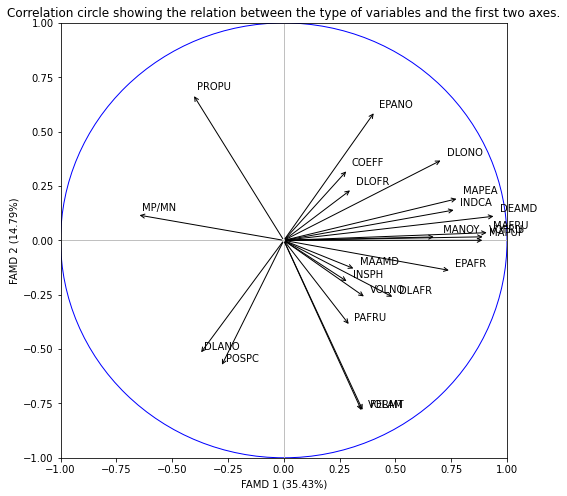

In [ ]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
axes.set_xlabel('FAMD 1 (35.43%)')
axes.set_ylabel('FAMD 2 (14.79%)')

#affichage des étiquettes (noms des variables)
for j in range(p):
  x=corvar[j,0]
  y=corvar[j,1]
  axes.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
  axes.annotate(features[j],(x+0.02,y+0.02))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#Ajout de titre
axes.set_title('Correlation circle showing the relation between the type of variables and the first two axes.')

# Sauvegarde
fig.savefig('gdrive/MyDrive/Colab Notebooks/mangoes_pca_Cercle_de_Correlation.png')

#affichage
plt.show()

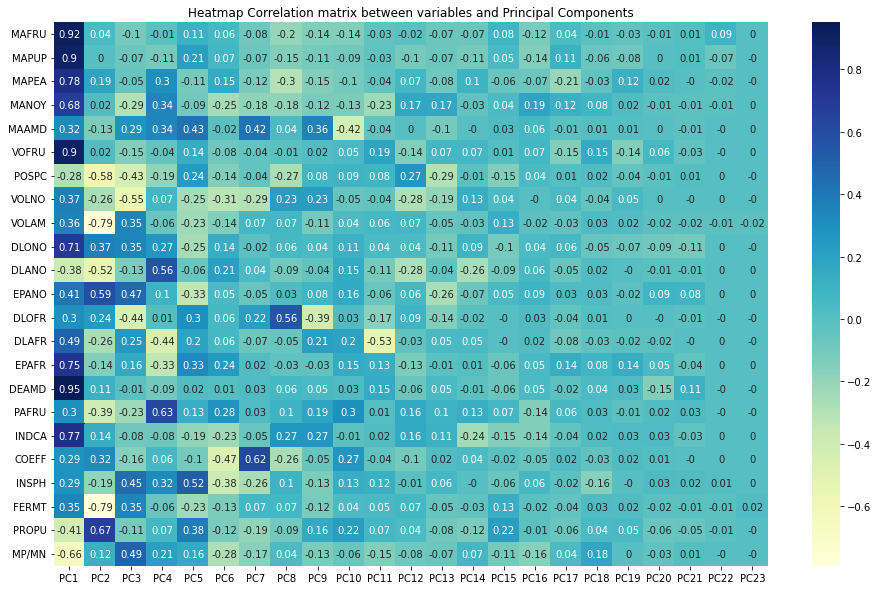

In [ ]:
#on affiche pour les deux premiers axes
#cp_list =  ["PC"+str(i) for i in list(range(1, p+1))]
cor_df = pd.DataFrame(data=corvar.round(2), index=features, columns=cp_list)

cor_df.to_excel('gdrive/MyDrive/Colab Notebooks/MangoesData_MatriceCorrelation.xlsx', sheet_name='Matrice de correlation')

#Affichage de la matrice de corrélation
fig, ax = plt.subplots(figsize=(16,10))
#sns.set(rc={'figure.figsize':(14,6)})
ax = sns.heatmap(cor_df, annot=True, fmt='g', cmap="YlGnBu")

#Ajout de titre
plt.title('Heatmap Correlation matrix between variables and Principal Components')

fig.savefig('gdrive/MyDrive/Colab Notebooks/mangoes_pca correlation_matrix.png')
plt.show();